In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('_dataset/card_transdata.csv',
                   low_memory=False)

In [3]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Percent of fraud is: 8.7403 %


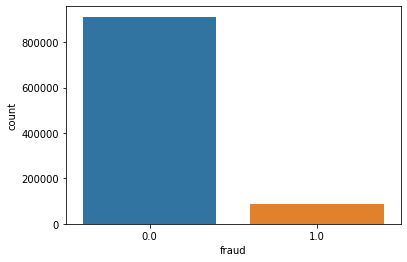

In [10]:
print('Percent of fraud is: {} %'.format(100*data[data['fraud']==1].shape[0]/data.shape[0]))
sns.countplot(x='fraud', data=data);

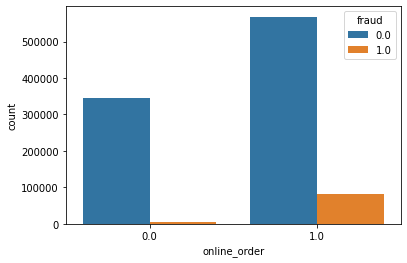

In [13]:
sns.countplot(x='online_order', data=data, hue='fraud');

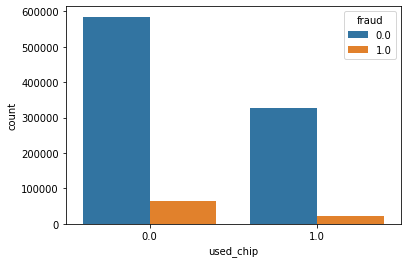

In [15]:
sns.countplot(x='used_chip', data=data, hue='fraud');

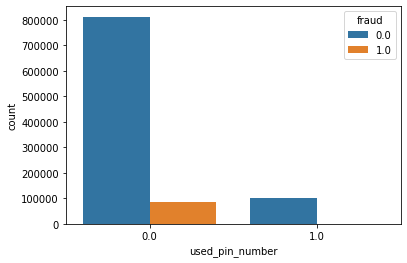

In [16]:
sns.countplot(x='used_pin_number', data=data, hue='fraud');

In [17]:
data.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


In [18]:
X = data.drop(columns=['fraud'])
y = data['fraud']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.naive_bayes import GaussianNB

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600000, 7), (400000, 7), (600000,), (400000,))

In [24]:
clf1 = DTC(criterion='gini')
clf2 = RFC(n_estimators=5, criterion='gini')
clf3 = GaussianNB()

In [25]:
clf1.fit(X_train, y_train)
print('1st Mode is done!')
clf2.fit(X_train, y_train)
print('2nd Mode is done!')
clf3.fit(X_train, y_train)
print('3rd Mode is done!')

1st Mode is done!
2nd Mode is done!
3rd Mode is done!


In [26]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

In [31]:
print('1st Mode\'s accuracy-score is:', accuracy_score(y_true=y_test, y_pred=y_pred1))
print('2nd Mode\'s accuracy-score is:', accuracy_score(y_true=y_test, y_pred=y_pred2))
print('3rd Mode\'s accuracy-score is:', accuracy_score(y_true=y_test, y_pred=y_pred3))

1st Mode's accuracy-score is: 0.99998
2nd Mode's accuracy-score is: 0.9999825
3rd Mode's accuracy-score is: 0.9469825


In [28]:
print('1st Mode\'s f1-score is:', f1_score(y_true=y_test, y_pred=y_pred1))
print('2nd Mode\'s f1-score is:', f1_score(y_true=y_test, y_pred=y_pred2))
print('3rd Mode\'s f1-score is:', f1_score(y_true=y_test, y_pred=y_pred3))

1st Mode's f1-score is: 0.9998852849235711
2nd Mode's f1-score is: 0.9998996228687783
3rd Mode's f1-score is: 0.6494073302583941


In [29]:
print('1st Mode\'s precision-score is:', precision_score(y_true=y_test, y_pred=y_pred1))
print('2nd Mode\'s precision-score is:', precision_score(y_true=y_test, y_pred=y_pred2))
print('3rd Mode\'s precision-score is:', precision_score(y_true=y_test, y_pred=y_pred3))

1st Mode's precision-score is: 0.9999426391717097
2nd Mode's precision-score is: 0.9999713187632651
3rd Mode's precision-score is: 0.7666874853618549


In [30]:
print('1st Mode\'s recall-score is:', recall_score(y_true=y_test, y_pred=y_pred1))
print('2nd Mode\'s recall-score is:', recall_score(y_true=y_test, y_pred=y_pred2))
print('3rd Mode\'s recall-score is:', recall_score(y_true=y_test, y_pred=y_pred3))

1st Mode's recall-score is: 0.9998279372544521
2nd Mode's recall-score is: 0.9998279372544521
3rd Mode's recall-score is: 0.5632473975509736


In [32]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_true=y_test, y_pred=y_pred3))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    365129
         1.0       0.77      0.56      0.65     34871

    accuracy                           0.95    400000
   macro avg       0.86      0.77      0.81    400000
weighted avg       0.94      0.95      0.94    400000



In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_true=y_test, y_pred=y_pred3)

array([[359152,   5977],
       [ 15230,  19641]])

In [37]:
activity = pd.read_csv('_dataset/activity.csv')

In [38]:
activity

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [41]:
activity.isnull().sum().sum()

0

In [43]:
activity.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


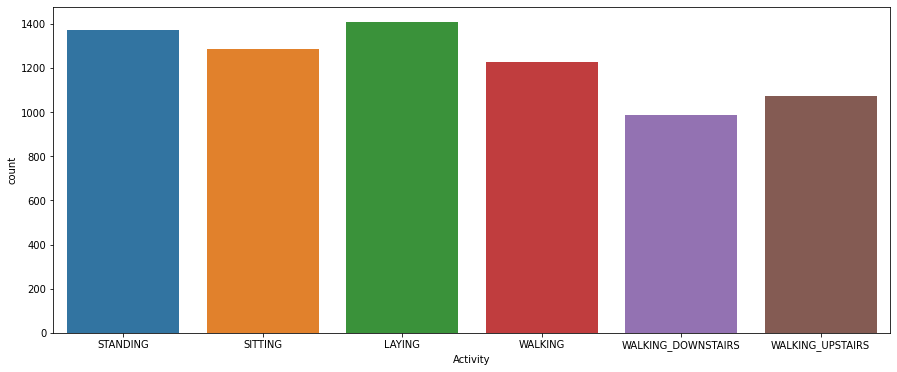

In [46]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Activity', data=activity);

In [47]:
X = activity.drop(columns=['subject', 'Activity'])
y = activity['Activity']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4411, 561), (2941, 561), (4411,), (2941,))

In [53]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN

In [55]:
steps1 = [('dimension reduction', PCA(n_components=0.9)),
          ('classifier', DTC(criterion='gini'))] 

steps2 = [('dimension reduction', PCA(n_components=0.9)),
          ('classifier', RFC(n_estimators=10,
                             criterion='gini'))] 

steps3 = [('dimension reduction', PCA(n_components=0.9)),
          ('classifier', SVC(kernel='rbf'))] 

steps4 = [('dimension reduction', PCA(n_components=0.9)),
          ('classifier', KNN(n_neighbors=5))] 

steps5 = [('dimension reduction', PCA(n_components=0.9)),
          ('classifier', KNN(n_neighbors=7))] 


clf1 = Pipeline(steps=steps1).fit(X_train, y_train)
clf2 = Pipeline(steps=steps2).fit(X_train, y_train)
clf3 = Pipeline(steps=steps3).fit(X_train, y_train)
clf4 = Pipeline(steps=steps4).fit(X_train, y_train)
clf5 = Pipeline(steps=steps5).fit(X_train, y_train)

In [56]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)
y_pred5 = clf5.predict(X_test)

In [57]:
print(classification_report(y_true=y_test, y_pred=y_pred1))

                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       578
           SITTING       0.76      0.76      0.76       515
          STANDING       0.77      0.77      0.77       531
           WALKING       0.88      0.91      0.89       475
WALKING_DOWNSTAIRS       0.87      0.85      0.86       391
  WALKING_UPSTAIRS       0.89      0.87      0.88       451

          accuracy                           0.86      2941
         macro avg       0.86      0.86      0.86      2941
      weighted avg       0.86      0.86      0.86      2941



In [62]:
print(classification_report(y_true=y_test, y_pred=y_pred2))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       578
           SITTING       0.82      0.77      0.79       515
          STANDING       0.80      0.84      0.82       531
           WALKING       0.92      0.97      0.95       475
WALKING_DOWNSTAIRS       0.91      0.93      0.92       391
  WALKING_UPSTAIRS       0.96      0.89      0.93       451

          accuracy                           0.90      2941
         macro avg       0.90      0.90      0.90      2941
      weighted avg       0.90      0.90      0.90      2941



In [59]:
print(classification_report(y_true=y_test, y_pred=y_pred3))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       578
           SITTING       0.89      0.81      0.84       515
          STANDING       0.83      0.90      0.86       531
           WALKING       0.99      1.00      0.99       475
WALKING_DOWNSTAIRS       0.99      0.99      0.99       391
  WALKING_UPSTAIRS       0.99      0.99      0.99       451

          accuracy                           0.94      2941
         macro avg       0.95      0.95      0.95      2941
      weighted avg       0.94      0.94      0.94      2941



In [60]:
print(classification_report(y_true=y_test, y_pred=y_pred4))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       578
           SITTING       0.89      0.79      0.84       515
          STANDING       0.82      0.91      0.86       531
           WALKING       0.98      1.00      0.99       475
WALKING_DOWNSTAIRS       0.99      0.96      0.97       391
  WALKING_UPSTAIRS       0.98      0.99      0.98       451

          accuracy                           0.94      2941
         macro avg       0.94      0.94      0.94      2941
      weighted avg       0.94      0.94      0.94      2941



In [61]:
print(classification_report(y_true=y_test, y_pred=y_pred5))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       578
           SITTING       0.90      0.77      0.83       515
          STANDING       0.81      0.92      0.86       531
           WALKING       0.98      1.00      0.99       475
WALKING_DOWNSTAIRS       0.99      0.96      0.97       391
  WALKING_UPSTAIRS       0.98      0.99      0.98       451

          accuracy                           0.94      2941
         macro avg       0.94      0.94      0.94      2941
      weighted avg       0.94      0.94      0.94      2941



In [63]:
acc = []
n_es = []

for n in range(2, 31):
    steps = [('dimension reduction', PCA(n_components=0.95)),
             ('classifier', RFC(n_estimators=n,
                                criterion='gini'))]
    clf = Pipeline(steps=steps).fit(X_train, y_train)
    n_es.append(n)
    acc.append(accuracy_score(y_true=y_test,
                              y_pred=clf.predict(X_test)))
    
    print(n, acc[-1])
    

2 0.726963617817069
3 0.8044882692961578
4 0.8442706562393744
5 0.8582114926895614
6 0.8738524311458687
7 0.9003740224413465
8 0.8867732063923836
9 0.9003740224413465
10 0.9010540632437947
11 0.9112546752805168
12 0.9041142468548113
13 0.9129547772866372
14 0.9149948996939816
15 0.9231553893233594
16 0.9241754505270316
17 0.9234954097245834
18 0.9200952057123427
19 0.9272356341380483
20 0.9296157769466168
21 0.9299557973478408
22 0.921455287317239
23 0.9275756545392724
24 0.9285957157429445
25 0.9275756545392724
26 0.9347160829649779
27 0.9296157769466168
28 0.9282556953417205
29 0.925875552533152
30 0.9343760625637538


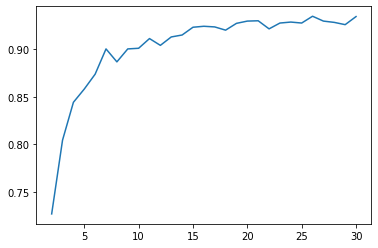

In [65]:
plt.plot(n_es, acc);

In [66]:
from sklearn.model_selection import KFold

In [80]:
kf = KFold(n_splits=10)

In [81]:
kf.get_n_splits(X, y)

10

In [82]:
acc = []
for train_index, test_index in kf.split(np.asarray(X)):
    X_train, X_test = np.asarray(X)[train_index, :], np.asarray(X)[test_index, :]
    y_train, y_test = np.asarray(y)[train_index], np.asarray(y)[test_index]
    
    steps = [('dimension reduction', PCA(n_components=0.9)),
             ('classifier', KNN(n_neighbors=5))]
    
    clf = Pipeline(steps=steps).fit(X_train, y_train)
    acc.append(accuracy_score(y_true=y_test,
                              y_pred=clf.predict(X_test)))

In [83]:
100*np.mean(acc), 100*np.std(acc)

(87.37769890564921, 3.495015116341529)